In [1]:

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Import data

In [42]:
#btc options data
btc_data=pd.read_csv('data/btc_data.csv', sep=",")
#eth options data 
eth_data=pd.read_csv('data/eth_data.csv', sep=",")

* best_bid_amount, best_ask_amount: The amount of the best bid and ask.

* bid_iv, ask_iv: Implied volatility of the bid and ask.

* underlying_index, underlying_price: The index and price of the underlying asset.

* mark_iv: Market implied volatility.

* interest_rate: Interest rate used in options pricing.

* best_bid_price, best_ask_price: Price of the best bid and ask.

* open_interest: Total open interest of the option.
* settlement_price: The price at which the option was settled.

* instrument_name: The name of the options instrument.

* greeks: Various 'Greeks' such as rho, theta, vega, gamma, delta, which measure sensitivity to various factors.

* stats: Various statistics like volume, price change, low, high.

* settlement_period: The period over which the option settles, such as daily.

### EDA - BTC

In [43]:
btc_data.head()

,best_bid_amount,best_ask_amount,bid_iv,ask_iv,underlying_index,underlying_price,mark_iv,interest_rate,best_bid_price,best_ask_price,...,greeks.theta,greeks.vega,greeks.gamma,greeks.delta,stats.volume_usd,stats.volume,stats.price_change,stats.low,stats.high,settlement_period
0,0.0,20.7,0.0,151.10,SYN.BTC-4FEB24,43046.8715,85.49,0.0,0.0,0.1070,...,-4.77329,0.11167,0.00000,0.9982,0.00,0.0,NaN,NaN,NaN,day
1,0.0,92.5,0.0,110.01,SYN.BTC-4FEB24,43046.6290,85.49,0.0,0.0,0.0002,...,-0.87260,0.11172,0.00000,-0.0018,0.00,0.0,NaN,NaN,NaN,day
2,0.0,19.8,0.0,139.25,SYN.BTC-4FEB24,43046.8715,78.77,0.0,0.0,0.0955,...,-6.15599,0.15630,0.00001,0.9974,0.00,0.0,NaN,NaN,NaN,day
3,0.0,1.5,0.0,90.44,SYN.BTC-4FEB24,43046.8715,78.77,0.0,0.0,0.0001,...,-1.19951,0.15630,0.00001,-0.0026,12.92,3.0,0.0,0.0001,0.0001,day
4,0.0,20.7,0.0,126.92,SYN.BTC-4FEB24,43046.8715,66.52,0.0,0.0,0.0840,...,-4.09321,0.12306,0.00000,0.9980,0.00,0.0,NaN,NaN,NaN,day


In [44]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   best_bid_amount     658 non-null    float64
 1   best_ask_amount     658 non-null    float64
 2   bid_iv              658 non-null    float64
 3   ask_iv              658 non-null    float64
 4   underlying_index    658 non-null    object 
 5   underlying_price    658 non-null    float64
 6   mark_iv             658 non-null    float64
 7   interest_rate       658 non-null    float64
 8   best_bid_price      658 non-null    float64
 9   best_ask_price      658 non-null    float64
 10  open_interest       658 non-null    float64
 11  max_price           658 non-null    float64
 12  min_price           658 non-null    float64
 13  last_price          501 non-null    float64
 14  asks                658 non-null    object 
 15  bids                658 non-null    object 
 16  settleme

In [45]:
btc_data.isnull().sum()

best_bid_amount         0
best_ask_amount         0
bid_iv                  0
ask_iv                  0
underlying_index        0
underlying_price        0
mark_iv                 0
interest_rate           0
best_bid_price          0
best_ask_price          0
open_interest           0
max_price               0
min_price               0
last_price            157
asks                    0
bids                    0
settlement_price       42
instrument_name         0
mark_price              0
index_price             0
change_id               0
timestamp               0
greeks.rho              0
greeks.theta            0
greeks.vega             0
greeks.gamma            0
greeks.delta            0
stats.volume_usd        0
stats.volume            0
stats.price_change    361
stats.low             361
stats.high            361
settlement_period       0
dtype: int64

In [46]:
btc_data_key= btc_data
key_metrics = ['best_bid_price', 'best_ask_price', 'bid_iv', 'ask_iv', 'mark_iv', 
               'greeks.theta', 'greeks.vega', 'greeks.gamma', 'greeks.delta']

descriptive_stats = btc_data_key[key_metrics].describe()

# Additionally, calculate the interquartile range (IQR) to identify potential outliers
Q1 = btc_data[key_metrics].quantile(0.25)
Q3 = btc_data[key_metrics].quantile(0.75)
IQR = Q3 - Q1

descriptive_stats, IQR


(       best_bid_price  best_ask_price      bid_iv      ask_iv     mark_iv  \
 count      658.000000      658.000000  658.000000  658.000000  658.000000   
 mean         0.083099        0.210988   29.016459  130.437629   52.996292   
 std          0.161699        0.366406   25.183052  157.825297   17.467371   
 min          0.000000        0.000000    0.000000    0.000000    5.000000   
 25%          0.000000        0.001825    0.000000   44.680000   40.550000   
 50%          0.006500        0.047750   36.110000   57.725000   51.240000   
 75%          0.099750        0.182750   49.577500  135.285000   59.520000   
 max          1.550000        2.000000  159.220000  501.440000  100.000000   
 
        greeks.theta  greeks.vega  greeks.gamma  greeks.delta  
 count    658.000000   658.000000    658.000000    658.000000  
 mean     -19.331028    41.442485      0.000061      0.047687  
 std       19.306432    48.395987      0.000130      0.621394  
 min     -107.968160     0.000130      0

In [47]:
btc_data_key.describe 

<bound method NDFrame.describe of      best_bid_amount  best_ask_amount  bid_iv  ask_iv underlying_index  \
0                0.0             20.7    0.00  151.10   SYN.BTC-4FEB24   
1                0.0             92.5    0.00  110.01   SYN.BTC-4FEB24   
2                0.0             19.8    0.00  139.25   SYN.BTC-4FEB24   
3                0.0              1.5    0.00   90.44   SYN.BTC-4FEB24   
4                0.0             20.7    0.00  126.92   SYN.BTC-4FEB24   
..               ...              ...     ...     ...              ...   
653              0.0              0.0    0.00    0.00      BTC-27DEC24   
654             16.0              0.1   63.81   65.54      BTC-27DEC24   
655              0.0              0.0    0.00    0.00      BTC-27DEC24   
656             17.0              0.1   63.86   66.23      BTC-27DEC24   
657              0.0              0.0    0.00    0.00      BTC-27DEC24   

     underlying_price  mark_iv  interest_rate  best_bid_price  best_ask_price

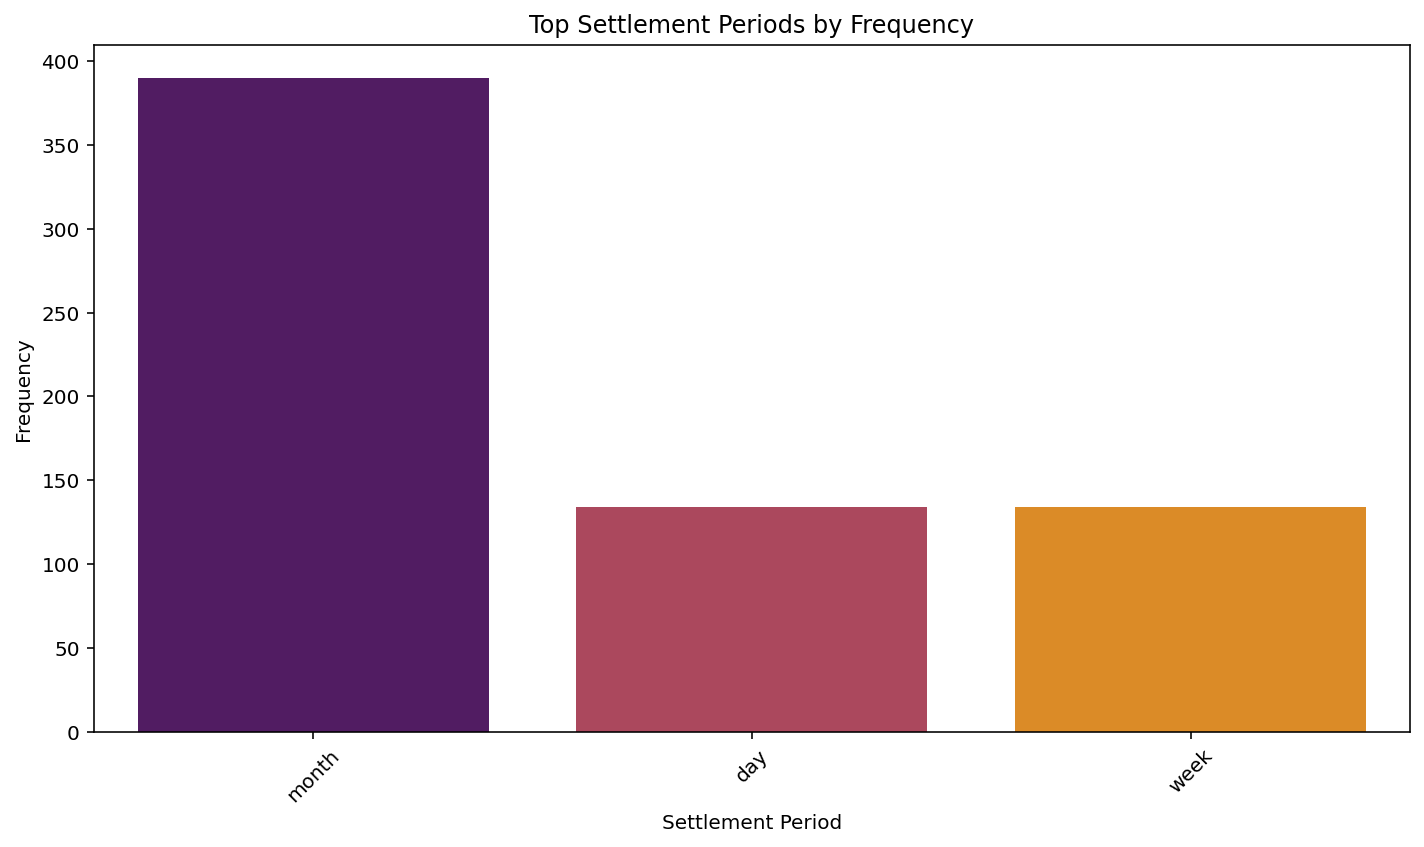

In [48]:
# Compute the frequency of each unique settlement period
btc_settlement_freq = btc_data['settlement_period'].value_counts().reset_index()
btc_settlement_freq.columns = ['settlement_period', 'Frequency']  # Renaming columns appropriately

# Creating a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='settlement_period', y='Frequency', data=btc_settlement_freq, palette="inferno")
plt.xticks(rotation=45)
plt.xlabel('Settlement Period')
plt.ylabel('Frequency')
plt.title('Top Settlement Periods by Frequency')
plt.tight_layout()
plt.show()

### Distribution 

In [49]:
ir=btc_data['interest_rate']
ir.describe()

count    658.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: interest_rate, dtype: float64

In [57]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   best_bid_amount     658 non-null    float64
 1   best_ask_amount     658 non-null    float64
 2   bid_iv              658 non-null    float64
 3   ask_iv              658 non-null    float64
 4   underlying_index    658 non-null    object 
 5   underlying_price    658 non-null    float64
 6   mark_iv             658 non-null    float64
 7   best_bid_price      658 non-null    float64
 8   best_ask_price      658 non-null    float64
 9   open_interest       658 non-null    float64
 10  max_price           658 non-null    float64
 11  min_price           658 non-null    float64
 12  last_price          501 non-null    float64
 13  asks                658 non-null    object 
 14  bids                658 non-null    object 
 15  settlement_price    616 non-null    float64
 16  instrume

In [ ]:
num_data = btc_data.drop('interest_rate', axis=1, inplace = True)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df_num_dis= df_num.drop(columns=['length'])


# Stacking the data for a single box plot
stacked_data = btc_data.melt(var_name='Feature', value_name='Value')

# Create a single box plot
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
sns.boxplot(data=stacked_data, x='Feature', y='Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('data distribution',size=18)
plt.tight_layout()
plt.show()


## Correlation

In [55]:
import pandas as pd
import numpy as np
num_data = btc_data.drop('interest_rate', axis=1, inplace = True)
corr = btc_data.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,best_bid_amount,best_ask_amount,bid_iv,ask_iv,underlying_price,mark_iv,best_bid_price,best_ask_price,open_interest,max_price,min_price,last_price,settlement_price,mark_price,index_price,change_id,timestamp,greeks.rho,greeks.theta,greeks.vega,greeks.gamma,greeks.delta,stats.volume_usd,stats.volume,stats.price_change,stats.low,stats.high
best_bid_amount,1.000000,0.333981,0.119235,0.005480,-0.013901,0.069200,0.008505,0.014778,0.047960,0.007829,-0.021578,0.005272,0.009779,0.012243,-0.132752,0.057551,0.030138,0.039969,0.040182,-0.038833,-0.027485,0.057357,-0.008608,0.006003,-0.016648,-0.087745,-0.096600
best_ask_amount,0.333981,1.000000,0.016745,-0.144741,-0.183048,-0.064018,-0.072228,-0.136192,0.090288,-0.127477,-0.089553,-0.134875,-0.125205,-0.117707,-0.172307,0.135794,-0.157435,0.121672,-0.030637,-0.152032,-0.010117,0.152903,-0.039535,-0.001624,-0.064068,-0.187836,-0.199457
bid_iv,0.119235,0.016745,1.000000,-0.059677,0.514686,0.108177,0.251264,0.057091,0.189287,-0.147231,-0.119750,-0.225346,-0.172635,-0.145281,0.206829,0.238944,0.536714,0.025671,0.180267,0.479187,-0.201170,0.016971,-0.022794,-0.044186,0.122927,-0.104442,-0.145848
ask_iv,0.005480,-0.144741,-0.059677,1.000000,0.219566,0.223759,0.430504,0.859234,-0.035866,0.411163,0.087602,0.514296,0.431212,0.430373,0.155061,0.171372,0.198191,-0.132927,0.174349,0.101417,-0.150335,-0.020483,0.000298,-0.064298,0.051252,0.400405,0.435245
underlying_price,-0.013901,-0.183048,0.514686,0.219566,1.000000,0.238409,0.486356,0.413303,0.061688,0.375349,0.234508,0.384213,0.362152,0.379916,0.585828,0.126106,0.894276,-0.248254,0.283323,0.831123,-0.285221,0.029431,0.070951,-0.082413,0.059051,0.428734,0.428490
mark_iv,0.069200,-0.064018,0.108177,0.223759,0.238409,1.000000,0.100212,0.194321,0.012029,0.341351,0.184911,0.326374,0.334570,0.353842,-0.006401,0.144640,0.316466,-0.063961,0.501018,0.030641,-0.532993,0.048456,-0.083928,-0.260484,0.179837,0.329225,0.290251
best_bid_price,0.008505,-0.072228,0.251264,0.430504,0.486356,0.100212,1.000000,0.679945,0.031840,0.559357,0.304952,0.605172,0.549114,0.556831,0.250813,0.106574,0.470762,-0.315643,0.161049,0.394908,-0.163901,0.007396,0.047594,-0.060736,0.006356,0.621579,0.597660
best_ask_price,0.014778,-0.136192,0.057091,0.859234,0.413303,0.194321,0.679945,1.000000,-0.004019,0.621122,0.254891,0.677843,0.625440,0.631390,0.202079,0.119410,0.418636,-0.342011,0.205795,0.317871,-0.185975,-0.102635,0.050579,-0.075498,0.026891,0.660975,0.670793
open_interest,0.047960,0.090288,0.189287,-0.035866,0.061688,0.012029,0.031840,-0.004019,1.000000,-0.028971,-0.030203,-0.053137,-0.039736,-0.027588,-0.146719,0.064767,0.127935,0.029330,0.064360,0.066815,-0.061082,0.055040,-0.013104,-0.008637,0.455776,-0.094276,-0.106714
max_price,0.007829,-0.127477,-0.147231,0.411163,0.375349,0.341351,0.559357,0.621122,-0.028971,1.000000,0.806465,0.961876,0.994404,0.994531,0.164390,0.021134,0.403109,-0.609471,0.263910,0.195955,-0.219313,-0.147607,0.155635,-0.085579,0.014930,0.958345,0.940832


In [53]:
eth_data.head()

,best_bid_amount,best_ask_amount,bid_iv,ask_iv,underlying_index,underlying_price,mark_iv,interest_rate,best_bid_price,best_ask_price,...,greeks.theta,greeks.vega,greeks.gamma,greeks.delta,stats.volume_usd,stats.volume,stats.price_change,stats.low,stats.high,settlement_period
0,0.0,198.0,0.0,134.69,SYN.ETH-4FEB24,2303.6341,52.50,0.0,0.0000,0.0900,...,-0.00492,0.00019,0.00000,0.99996,0.0,0.0,NaN,NaN,NaN,day
1,0.0,180.0,0.0,99.24,SYN.ETH-4FEB24,2303.6341,52.50,0.0,0.0000,0.0003,...,-0.00055,0.00019,0.00000,-0.00004,0.0,0.0,NaN,NaN,NaN,day
2,0.0,209.0,0.0,110.36,SYN.ETH-4FEB24,2303.6341,43.13,0.0,0.0000,0.0685,...,-0.01572,0.00073,0.00002,0.99982,0.0,0.0,NaN,NaN,NaN,day
3,0.0,720.0,0.0,81.04,SYN.ETH-4FEB24,2303.6341,43.13,0.0,0.0000,0.0004,...,-0.00206,0.00073,0.00002,-0.00018,0.0,0.0,NaN,NaN,NaN,day
4,3.0,166.0,0.0,89.76,SYN.ETH-4FEB24,2303.6341,43.00,0.0,0.0265,0.0475,...,-0.51708,0.02405,0.00052,0.99148,0.0,0.0,NaN,NaN,NaN,day


In [54]:
eth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   best_bid_amount     592 non-null    float64
 1   best_ask_amount     592 non-null    float64
 2   bid_iv              592 non-null    float64
 3   ask_iv              592 non-null    float64
 4   underlying_index    592 non-null    object 
 5   underlying_price    592 non-null    float64
 6   mark_iv             592 non-null    float64
 7   interest_rate       592 non-null    float64
 8   best_bid_price      592 non-null    float64
 9   best_ask_price      592 non-null    float64
 10  open_interest       592 non-null    float64
 11  max_price           592 non-null    float64
 12  min_price           592 non-null    float64
 13  last_price          437 non-null    float64
 14  asks                592 non-null    object 
 15  bids                592 non-null    object 
 16  settleme